# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Danny Sanchez Sanchez

* __Rol__: 201810506-6

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
# cantidad en bytes del dataframe
import sys
 
sys.getsizeof(digits)

467364

In [7]:
# metricas varias de las columnas dataset
digits.describe().T

,count,mean,std,min,25%,50%,75%,max
c00,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
c01,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
c02,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
c03,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
c04,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
c60,1797.0,11.809126,4.933947,0.0,10.0,14.0,16.0,16.0
c61,1797.0,6.764051,5.900623,0.0,0.0,6.0,12.0,16.0
c62,1797.0,2.067891,4.090548,0.0,0.0,0.0,2.0,16.0
c63,1797.0,0.364496,1.860122,0.0,0.0,0.0,0.0,16.0


In [8]:
digits.dtypes.unique()

array([dtype('int32')], dtype=object)

In [9]:
digits.isnull().sum(axis = 0)

c00       0
c01       0
c02       0
c03       0
c04       0
         ..
c60       0
c61       0
c62       0
c63       0
target    0
Length: 65, dtype: int64

In [10]:
digits.target.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
digits.target.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [12]:
digits.columns

Index(['c00', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09',
       'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19',
       'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29',
       'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39',
       'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49',
       'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59',
       'c60', 'c61', 'c62', 'c63', 'target'],
      dtype='object')

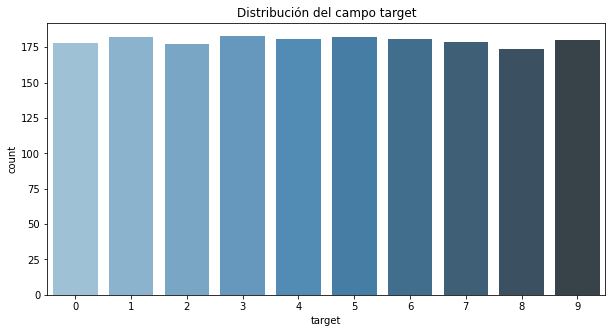

In [13]:
# Distribucion de los datos
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
sns.countplot(x="target", data=digits, palette="Blues_d", ax = ax)
ax.set_title('Distribución del campo target')
plt.show()

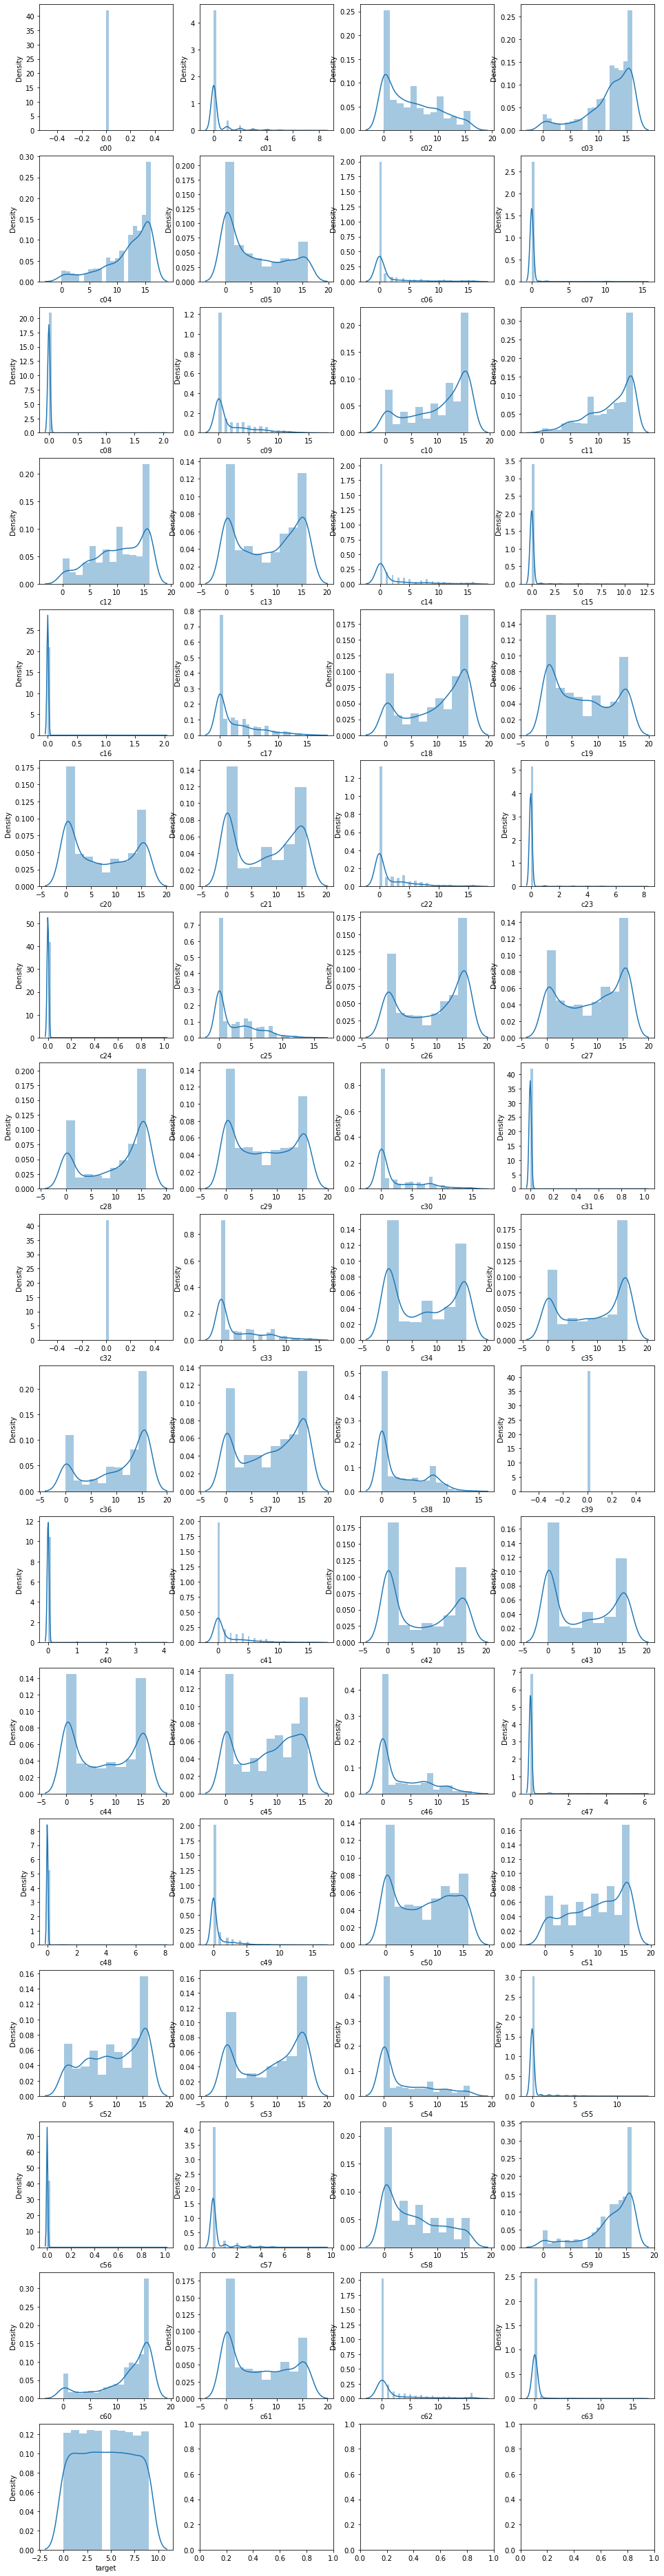

In [14]:
n_show = digits.shape[1]

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i,  column in enumerate(digits.columns[:n_show]):
  sns.distplot(digits[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  i = i+1
plt.show()

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [15]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

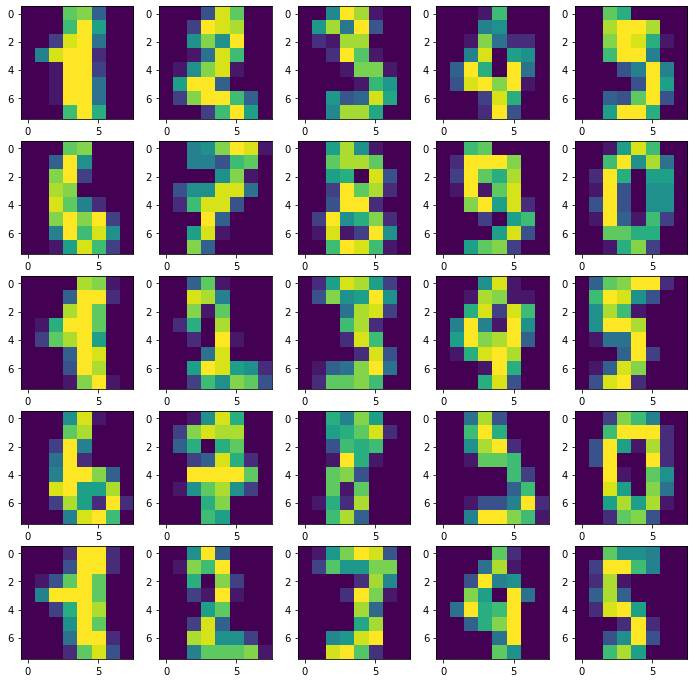

In [16]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(digits_dict["images"][i])

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [17]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print("Largo Train: ", X_train.shape)
print("Largo Test: ", X_test.shape)

Largo Train:  (1257, 64)
Largo Test:  (540, 64)


# Regresion Logistica

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [21]:
parameters = {'penalty': ['l1', 'l2', 'elasticnet'], 'C':[1, 10]}
reg = LogisticRegression()
gs = GridSearchCV(reg, parameters)
gs.fit(X_train, y_train)
print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

Best: 0.956254 con {'C': 1, 'penalty': 'l2'}


Text(0.5, 1.0, 'Confusion Regresion Logistica')

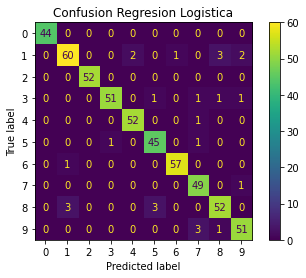

In [22]:
#Entrenar modelo
clf_reg = LogisticRegression(penalty='l2', C=1)
clf_reg.fit(X_train, y_train)

y_pred_reg = clf_reg.predict(X_test)

disp = plot_confusion_matrix(clf_reg, X_test, y_test)
disp.ax_.set_title("Confusion Regresion Logistica")


In [23]:
confusion_matrix(y_test, y_pred_reg)

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  2,  0,  1,  0,  3,  2],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  1,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 52,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 45,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  1],
       [ 0,  3,  0,  0,  0,  3,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  1, 51]], dtype=int64)

In [24]:
#Métricas
target_names = [ str(i) for i in range(0,10)]
print(classification_report(y_test, y_pred_reg, target_names=target_names, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        44
           1    0.93750   0.88235   0.90909        68
           2    1.00000   1.00000   1.00000        52
           3    0.98077   0.92727   0.95327        55
           4    0.96296   0.98113   0.97196        53
           5    0.91837   0.95745   0.93750        47
           6    0.98276   0.98276   0.98276        58
           7    0.89091   0.98000   0.93333        50
           8    0.91228   0.89655   0.90435        58
           9    0.92727   0.92727   0.92727        55

    accuracy                        0.95000       540
   macro avg    0.95128   0.95348   0.95195       540
weighted avg    0.95065   0.95000   0.94990       540



# K vecinos mas cercanos

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn.get_params() 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [27]:
parameters_knn = {'n_neighbors':[1, 10]}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, parameters_knn)
gs.fit(X_train, y_train)
print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

Best: 0.988864 con {'n_neighbors': 1}


Text(0.5, 1.0, 'Confusion KNN')

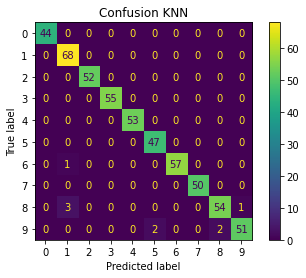

In [28]:
#Entrenar modelo
clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)

disp2 = plot_confusion_matrix(clf_knn, X_test, y_test)
disp2.ax_.set_title("Confusion KNN")

In [29]:
confusion_matrix(y_test, y_pred_knn)

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 68,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 54,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  2, 51]], dtype=int64)

In [30]:
#Métricas
target_names = [ str(i) for i in range(0,10)]
print(classification_report(y_test, y_pred_knn, target_names=target_names, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        44
           1    0.94444   1.00000   0.97143        68
           2    1.00000   1.00000   1.00000        52
           3    1.00000   1.00000   1.00000        55
           4    1.00000   1.00000   1.00000        53
           5    0.95918   1.00000   0.97917        47
           6    1.00000   0.98276   0.99130        58
           7    1.00000   1.00000   1.00000        50
           8    0.96429   0.93103   0.94737        58
           9    0.98077   0.92727   0.95327        55

    accuracy                        0.98333       540
   macro avg    0.98487   0.98411   0.98425       540
weighted avg    0.98366   0.98333   0.98324       540



# SVM

In [31]:
from sklearn import svm
from sklearn.svm import SVC

In [32]:
parameters = {'kernel':('linear', 'polynomial', 'rbf'), 'C':range(10)}
sv = svm.SVC()
gs_svm = GridSearchCV(sv, parameters)
gs_svm.fit(X_train, y_train)
print("Best: %f con %s" % (gs_svm.best_score_, gs_svm.best_params_))

Best: 0.991245 con {'C': 3, 'kernel': 'rbf'}


31.7 ms ± 371 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Text(0.5, 1.0, 'Confusion SVM')

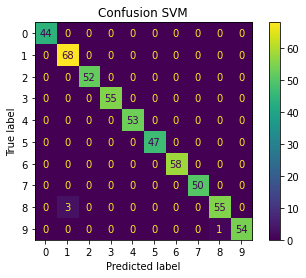

In [33]:
#Entrenar modelo
clf_svm = SVC(kernel= 'rbf', C=3)
%timeit clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)

disp2 = plot_confusion_matrix(clf_svm, X_test, y_test)
disp2.ax_.set_title("Confusion SVM")


In [34]:
confusion_matrix(y_test, y_pred_svm)

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 68,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 54]], dtype=int64)

In [35]:
#Métricas
target_names = [ str(i) for i in range(0,10)]
print(classification_report(y_test, y_pred_svm, target_names=target_names, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        44
           1    0.95775   1.00000   0.97842        68
           2    1.00000   1.00000   1.00000        52
           3    1.00000   1.00000   1.00000        55
           4    1.00000   1.00000   1.00000        53
           5    1.00000   1.00000   1.00000        47
           6    1.00000   1.00000   1.00000        58
           7    1.00000   1.00000   1.00000        50
           8    0.98214   0.94828   0.96491        58
           9    1.00000   0.98182   0.99083        55

    accuracy                        0.99259       540
   macro avg    0.99399   0.99301   0.99342       540
weighted avg    0.99276   0.99259   0.99258       540



# Conclusion:
El mejor modelo es SVM con kernel rbf, con un best_score del orden de 99%

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
clf_final = SVC(kernel='rbf', C=3)
scores = cross_val_score(clf_final, X, y, cv=10)
print("intervalo de confianza para Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

intervalo de confianza para Accuracy: 0.98 (+/- 0.04)


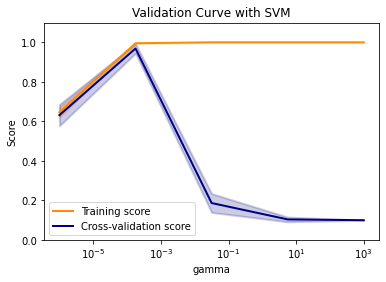

In [38]:
# Curva de validación

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplots, show
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, 3, 5)
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf',C=3), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1,cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig, ax = subplots()



plt.title('Validation Curve with SVM')

plt.ylim(0.0, 1.1)
lw = 2
ax.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
ax.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
ax.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
ax.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
ax.legend(loc="best")
ax.set_xlabel('gamma')
ax.set_ylabel('Score')
show()

Se ouede apreciar que el mejor $\gamma$ viene dado por $\gamma=0.01$ para no caer en underftting y overfitting

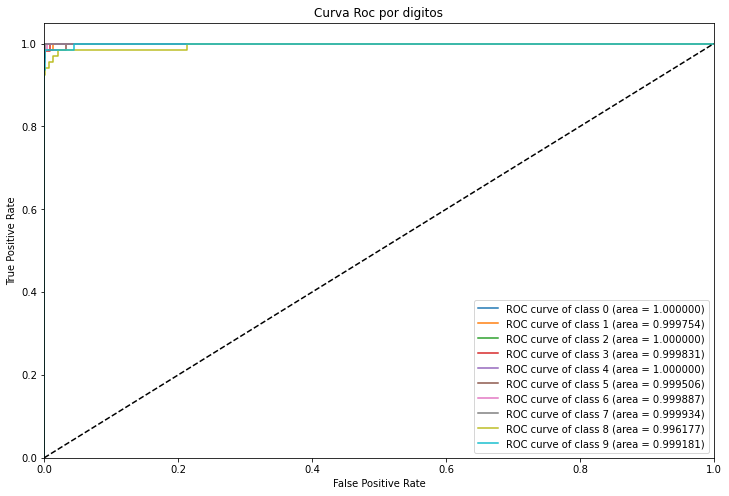

In [39]:
# ROC curve

from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10

# shuffle and split training and test sets
X_train2, X_test2, y_train2, y_test2 =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf_roc = OneVsRestClassifier(SVC(kernel='rbf', C=3))
y_score = clf_roc.fit(X_train2, y_train2).decision_function(X_test2)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=[12,8])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label='ROC curve of class {0} (area = {1:f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc por digitos')
plt.legend(loc="lower right")
plt.show()

Para todos los casos el modelo ajusta de buena manera.

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


Podemos notar, gracias al EDA realizado, que hay columnas de puros ceros, por lo que eliminaresmos esas columnas, contando son apoximadamente 22, por lo que nos quedaremos con 63-22=41 atributos que contribuyen al análisis.

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [41]:
X_new = digits.drop(columns="target").values
y_new = digits["target"].values

In [42]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [43]:
# algoritmo univariante de prueba F.
k = 41  # atributos
seleccionadas = SelectKBest(f_classif, k=k).fit(X_train3, y_train3)

In [44]:
catrib = seleccionadas.get_support()
atributos = [digits.columns[i] for i in list(catrib.nonzero()[0])] ## columnas importantes

In [45]:
digits_best=digits[atributos]

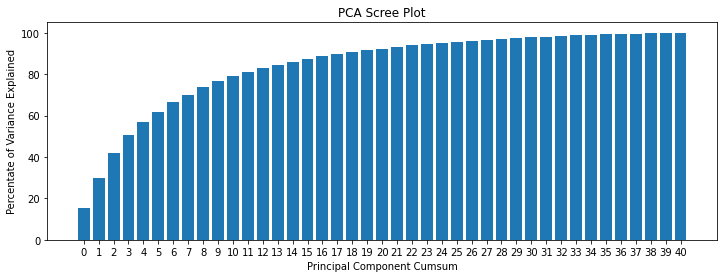

In [46]:
# ajustar modelo
from sklearn.decomposition import PCA

pca = PCA(n_components=41)
principalComponents = pca.fit_transform(digits_best)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = [str(x) for x in list(range(41))]

plt.figure(figsize=(12,4))
plt.bar(x= range(1,42), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [47]:
principaldf = pd.DataFrame(data = principalComponents[:,list(range(21))], columns = ['PC'+str(i) for i in range(21)])
targetDataframe = digits[['target']]

df_pca = pd.concat([principaldf, targetDataframe],axis = 1)

In [48]:
df_pca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,target
0,-2.858154,21.910657,-7.610982,14.139074,-5.405816,-6.720590,2.696409,3.302387,0.701365,-3.686973,...,-4.335050,-0.431603,0.792621,2.004148,2.027119,1.808744,-4.672324,3.412475,0.669913,0
1,9.678509,-19.912325,2.801764,-14.424630,6.574480,-5.739814,3.008620,-5.628509,2.793186,2.210750,...,-5.231213,8.961867,-0.746873,-0.471558,1.476075,-6.580810,2.349762,5.064005,-1.849663,1
2,7.393181,-8.970243,2.345356,-11.496446,-17.752752,-8.219064,2.344683,-14.996146,-1.278873,-4.976939,...,7.788946,-2.683410,2.986686,-6.973667,-3.799012,3.843673,-2.409122,-1.712637,-4.172053,2
3,-15.495936,1.944537,9.432426,-12.214386,6.881507,2.953251,0.220102,11.580342,2.408373,-5.892429,...,-5.610692,-0.625105,-0.639377,2.826049,1.906026,0.191590,-2.090107,1.920048,4.120454,3
4,24.401968,6.179789,-4.088832,-12.933190,-0.264023,-4.476037,1.228339,13.659597,3.818962,-10.949468,...,4.319307,6.513287,5.962615,6.100843,-2.677563,-3.154495,-0.051967,-7.711354,4.121313,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-15.176724,13.879573,-13.319404,-6.283645,4.059062,-1.487697,-6.074312,-5.088312,3.326477,8.146080,...,-2.366427,1.947988,4.963849,0.772731,-0.100676,-1.852654,-1.056549,-1.162880,1.961771,9
1793,5.056755,21.981762,-6.798510,14.356104,-6.098690,-12.684461,4.354317,-0.922161,-8.297486,3.078377,...,6.207061,2.439686,-4.209667,-1.758637,-1.855577,-1.515352,5.012568,2.002686,0.786095,0
1794,10.468399,-6.632695,5.589312,-7.497858,-2.448297,-15.480710,-4.022310,-3.834164,-8.013340,12.337428,...,-0.135839,-2.602819,8.285570,0.524574,4.118951,3.190707,-2.232621,-2.938078,0.947574,8
1795,-5.730121,13.299245,-10.680082,-5.620062,3.899213,2.717669,-5.244899,-6.343622,-3.474214,10.539405,...,-0.693595,4.710635,4.540925,4.089694,4.682138,4.208811,-0.993528,3.765549,1.482271,9


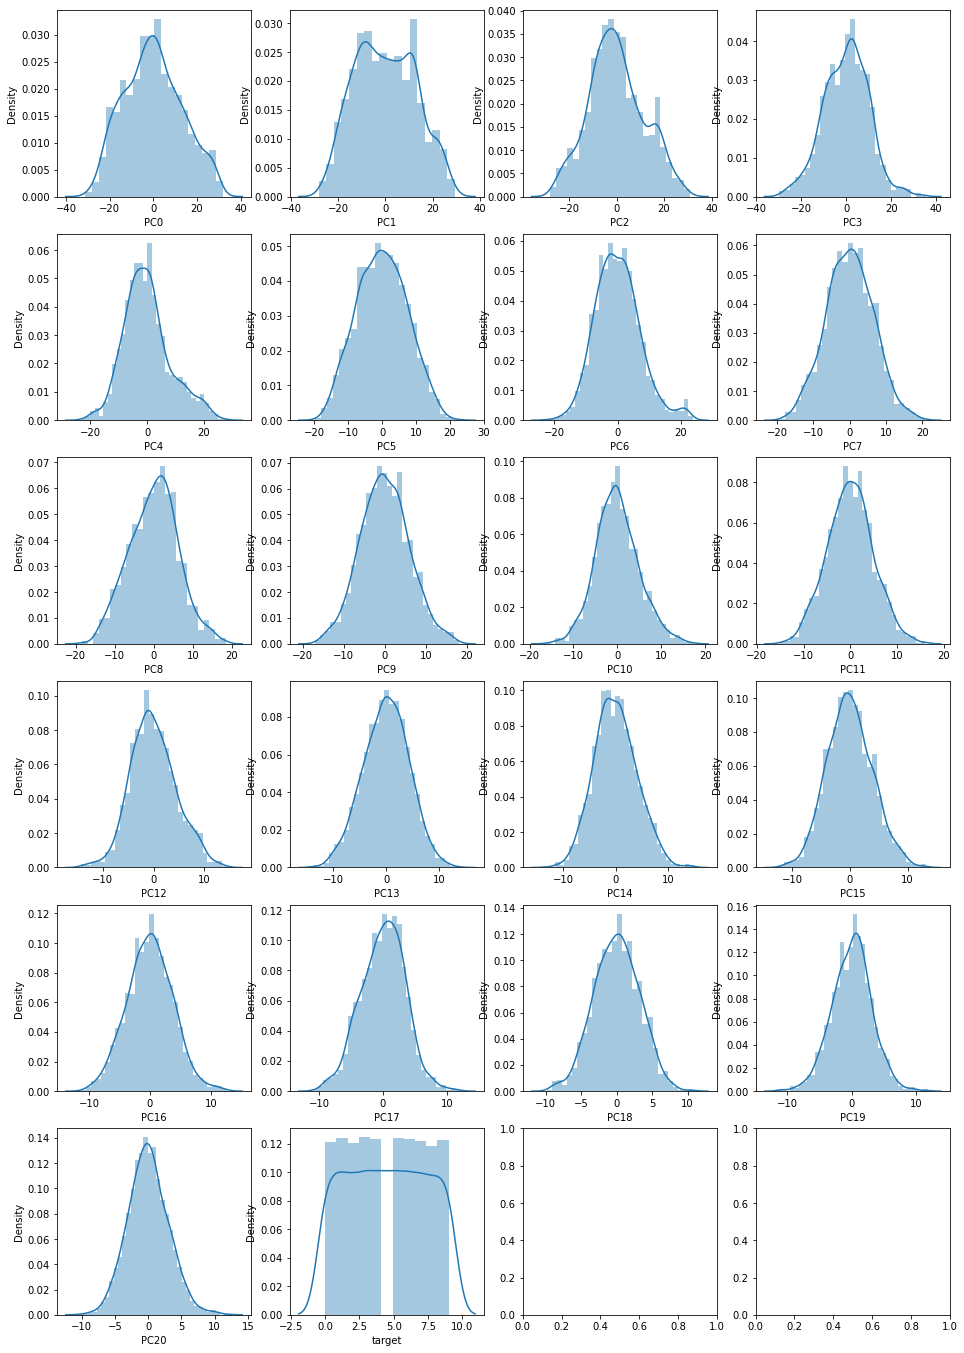

In [49]:
n_show = df_pca.shape[1]

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i,  column in enumerate(df_pca.columns[:n_show]):
  sns.distplot(df_pca[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  i = i+1
plt.show()

In [50]:
X_pca = df_pca.drop(columns="target").values
y_pca = df_pca["target"].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
clf_pca = SVC(kernel='rbf', C=3)
clf_pca.fit(X_train5,y_train5)
y_pred5 = clf_pca.predict(X_test5)
print(classification_report(y_test5, y_pred5, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     1.0000    1.0000    1.0000        28
           2     1.0000    1.0000    1.0000        33
           3     1.0000    0.9706    0.9851        34
           4     0.9787    1.0000    0.9892        46
           5     0.9592    1.0000    0.9792        47
           6     1.0000    1.0000    1.0000        35
           7     1.0000    0.9706    0.9851        34
           8     1.0000    0.9667    0.9831        30
           9     0.9750    0.9750    0.9750        40

    accuracy                         0.9889       360
   macro avg     0.9913    0.9883    0.9897       360
weighted avg     0.9892    0.9889    0.9889       360



Notese que las nuevas distribuciones para el df_pca (dataframe obtenido del pca) son casi normales, luego cualquier estimacion se tendrá un excelente resultado.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [51]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    Y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    Y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (Y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (Y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = np.array(Y_test)[mask]
    y_aux_pred = np.array(Y_pred)[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

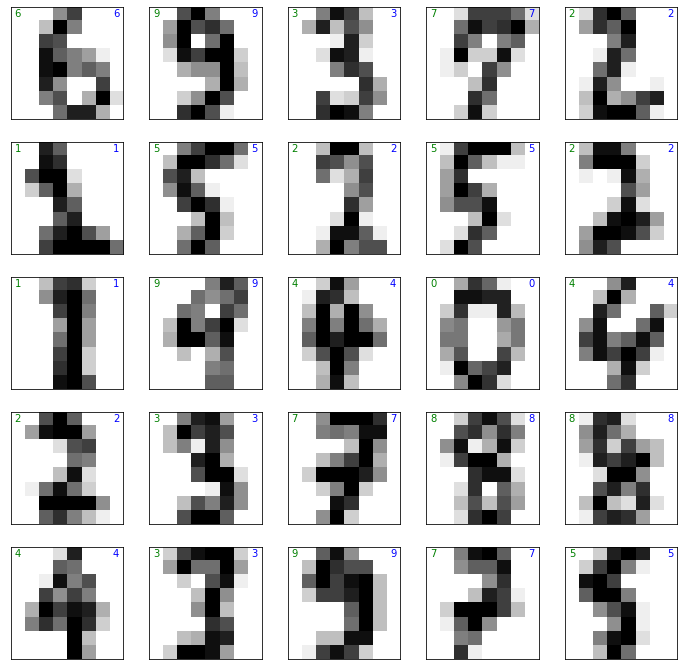

In [52]:
mostar_resultados(digits,SVC(kernel='rbf', C=3),nx=5, ny=5,label = "correctos")

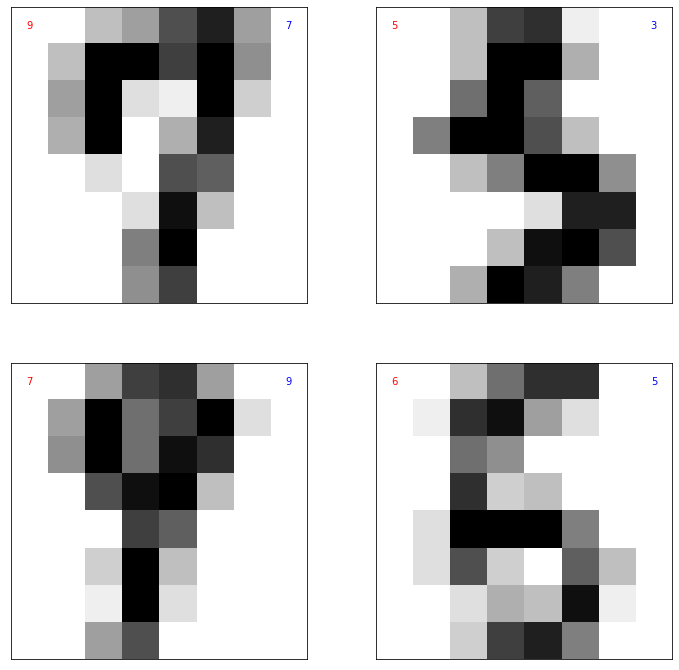

In [53]:
mostar_resultados(digits,SVC(kernel='rbf', C=3),nx=2, ny=2,label = "incorrectos")

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Notamos que una ingenieria de atributos logra un excelente resultado a la hora de modelar y entrenar distintos clasificadores, lo que si seria de mejor ayuda para el modelo, y quizas una nueva mejora, seria la mejor visualización de pixeles, que quizas sea más nitido o reducirlos un poco y fraccionar los ya existentes a modo de posible solución.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [54]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# EDA y Procesamiento

In [55]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notar que la variable Ocean Proximity no es flotante, por lo que haremos un label encoding.

In [56]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

housing['ocean_proximity'] = label.fit_transform(housing['ocean_proximity'])
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [57]:
housing.isnull().sum() #  npara variables nah ponemos ceros

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [58]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity,20640.0,1.165843,1.420662,0.0000,0.0000,1.0000,1.00000,4.0000


<AxesSubplot:>

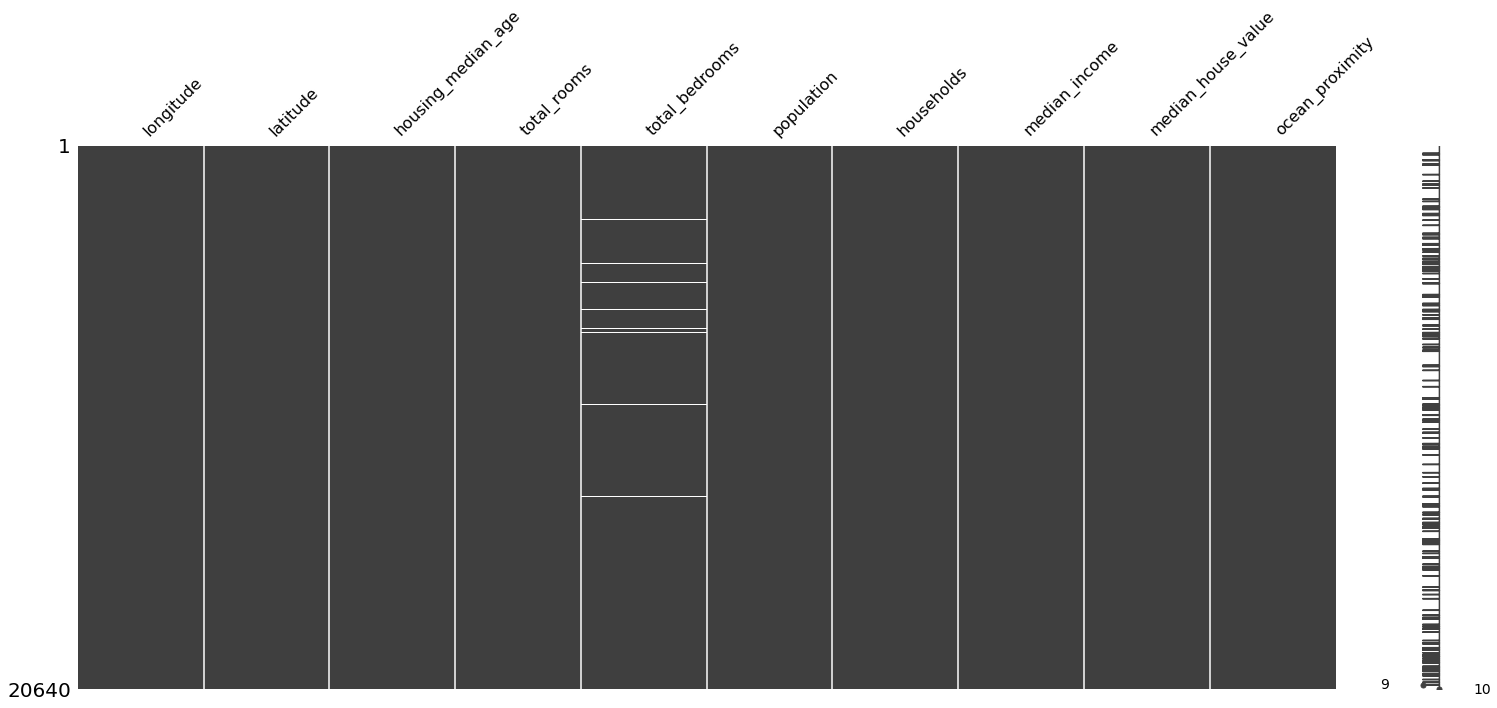

In [59]:
# Valores faltantes
import missingno as msno

msno.matrix(housing)

In [60]:
# reemplazamos valores faltantes.
housing.total_bedrooms.fillna(method='pad', inplace=True)

<AxesSubplot:>

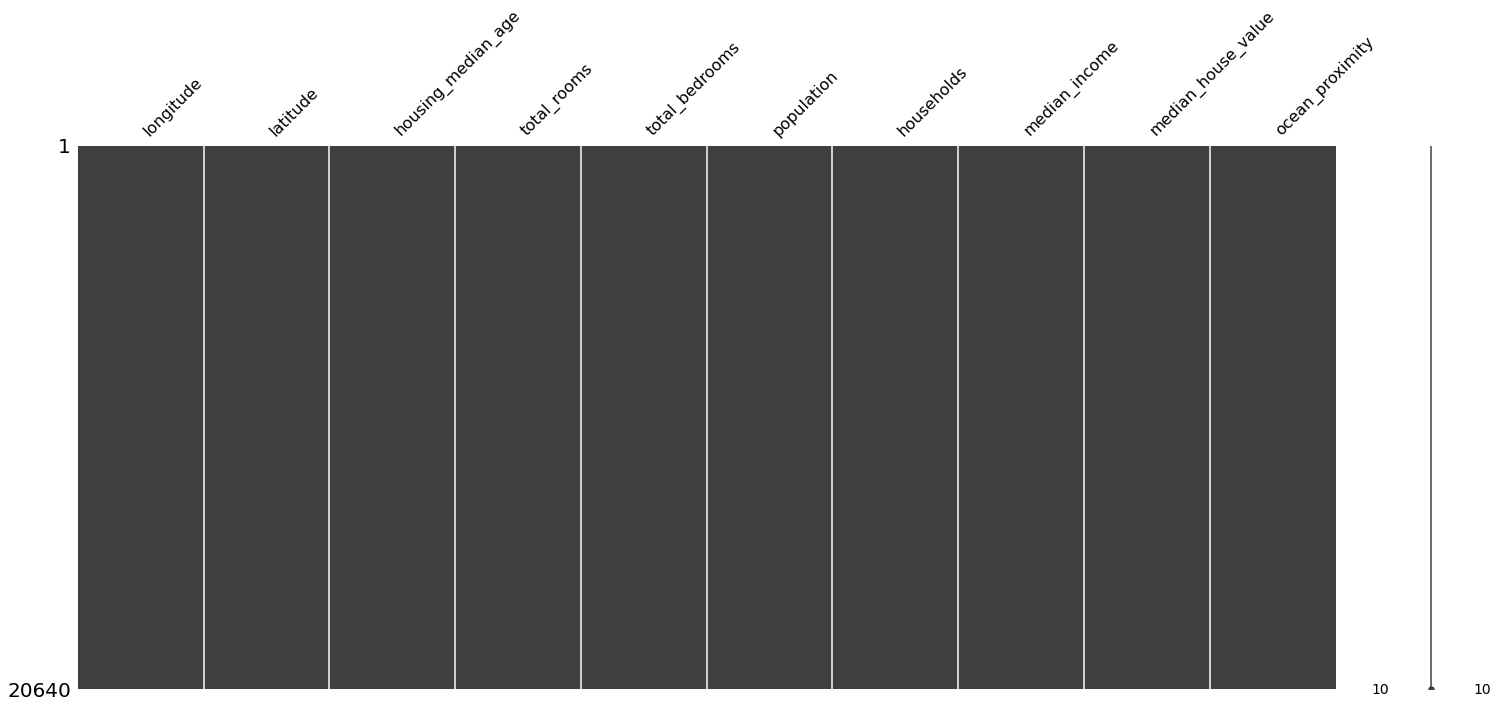

In [61]:
msno.matrix(housing)

In [62]:
housing.iloc[:,2:].describe().T #sin considerar longitud y latitud

,count,mean,std,min,25%,50%,75%,max
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.642151,420.876678,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity,20640.0,1.165843,1.420662,0.0000,0.0000,1.0000,1.00000,4.0000


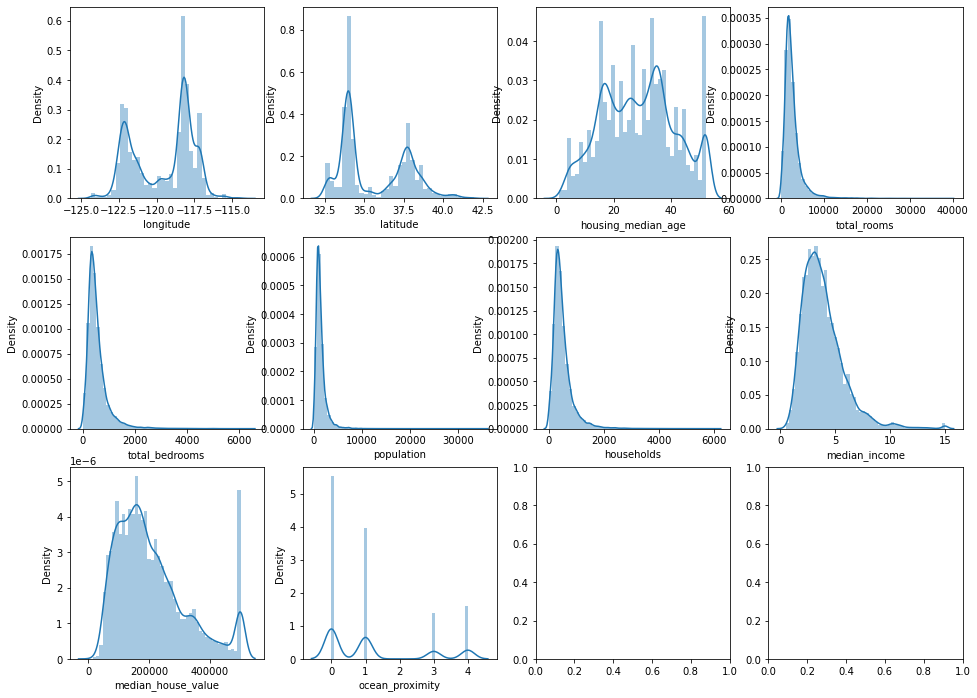

In [63]:
n_show_housing = housing.shape[1]

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show_housing/4))), nrows=int(np.ceil(n_show_housing/4)), ncols=4)
for i,  column in enumerate(housing.columns[:n_show]):
  sns.distplot(housing[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  i = i+1
plt.show()

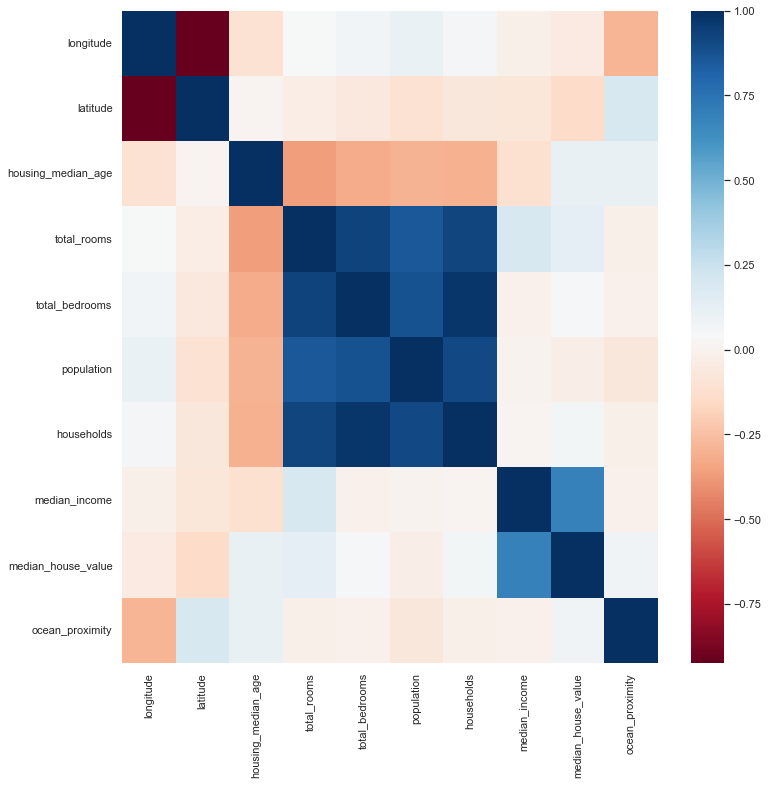

In [64]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(housing.corr(), cmap="RdBu")
plt.show() # sin target, i.e. median_value_house

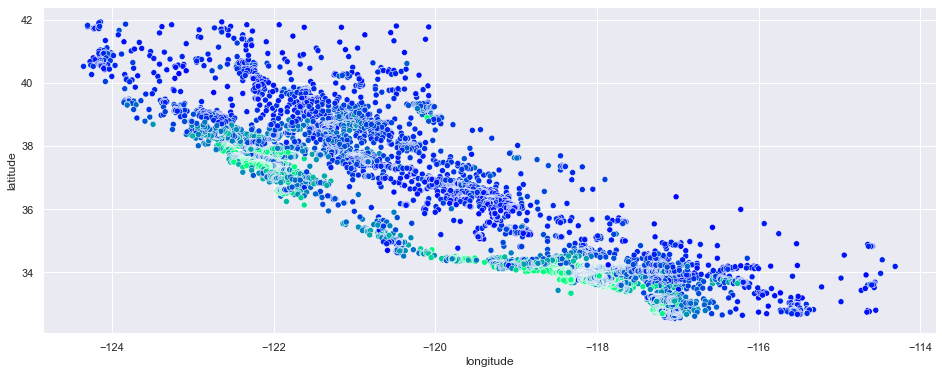

In [65]:
# Distribucion de casas por latitud longitud (metodo scatter)
plt.figure(figsize=(16,6))
fig = sns.scatterplot(housing.longitude, housing.latitude, hue=housing['median_house_value'],
                      legend=False, palette='winter');

Podemos notar que a medida que la casa se encuentre cerca de la costa, esta tendra un precio mas alto, como sucede en la vida real, por lo que es una variable de no mucha importancia para lo que se viene. (Ver histogramas hechos con label encoder)

# Modelamiento
Se probara de todo un poco, y finalmente mediante metricas decidiremos cual es el mejor modelo.

In [66]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV
from sklearn.decomposition  import PCA

In [67]:
from sklearn.model_selection import train_test_split
X_II = housing.drop(['median_house_value', 'ocean_proximity'], axis=1)
y_II = housing['median_house_value']

X_train_II, X_test_II, y_train_II, y_test_II = train_test_split(X_II,y_II, test_size=0.3,random_state=42)

## Lineal Regression

### Linear

In [68]:
lr = LinearRegression()
lr.fit(X_train_II, y_train_II)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print("RL\n")
# de aqui predice para el conjunto de train
print("_____________________________")
print("conjunto de train")
pred_train_lr= lr.predict(X_train_II)
print("RMSE ", np.sqrt(mean_squared_error(y_train_II,pred_train_lr))) #RMSE error cuadratico medio
print("R^2 ",r2_score(y_train_II, pred_train_lr)) #R_cuadrado 
# de aqui predice para el conjunto de validacion
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
pred_test_lr= lr.predict(X_test_II)
print("RMSE ",np.sqrt(mean_squared_error(y_test_II,pred_test_lr))) #RMSE
print("R^2 ",r2_score(y_test_II, pred_test_lr))  #R_cuadrado (cor de pearson)
print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test_II - lr.predict(X_test_II))/y_test_II)))*100)
print("_____________________________\n\n")

RL

_____________________________
conjunto de train
RMSE  69750.6657059847
R^2  0.6368463107869556
_____________________________
_____________________________
conjunto de validacion
RMSE  69841.73667547155
R^2  0.6283642570000871
_____________________________
MAPE
30.65265601811919
_____________________________




### Ridge

In [69]:
alphas = 10**np.linspace(10,-2,100)*0.5  #array de posibles valores para alfa
ridge = Ridge(normalize = True) #se puede quitar el normalizador, pero ya esta normali
coefs = []

for a in alphas:     #haciendo muchos ridge, y guardamos los coef en la lista
    ridge.set_params(alpha = a)
    ridge.fit(X_II, y_II)
    coefs.append(ridge.coef_)

#np.shape(coefs)
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train_II, y_train_II)
#ridgecv.alphas

# sobre los datos de entrenamiento
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train_II, y_train_II)
mean_squared_error(y_test_II, ridge4.predict(X_test_II))
h=ridge4.fit(X_II,y_II).get_params()

rr = Ridge(alpha=h["alpha"]) #cambiar alfa despues con cross validation!!!
rr.fit(X_train_II, y_train_II) 
pred_train_rr= rr.predict(X_train_II)

print("Ridge\n")
# de aqui predice para el conjunto de train
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train_II,pred_train_rr))) #RMSE
print("R^2 ",r2_score(y_train_II, pred_train_rr))  #R^cuadrado


 # de aqui predice para el conjunto de validacion
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
# para validation
pred_test_rr= rr.predict(X_test_II)
print("RMSE ",np.sqrt(mean_squared_error(y_test_II,pred_test_rr))) 
print("R^2 ",r2_score(y_test_II, pred_test_rr))
print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test_II - rr.predict(X_test_II))/y_test_II)))*100)
print("_____________________________\n\n")

Ridge

_____________________________
conjunto de train
RMSE  69750.66570599556
R^2  0.6368463107868425
_____________________________
_____________________________
conjunto de validacion
RMSE  69841.73592696304
R^2  0.6283642649658832
_____________________________
MAPE
30.652654898179293
_____________________________




### Lasso

In [70]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs_2 = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train_II), y_train_II)
    coefs_2.append(lasso.coef_)


lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train_II, y_train_II)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_II, y_train_II)
mean_squared_error(y_test_II, lasso.predict(X_test_II))


print("Lasso\n")
# de aqui predice para el conjunto de train
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train_II, lasso.predict(X_train_II)))) #RMSE
print("R^2 ",r2_score(y_train_II, lasso.predict(X_train_II)))  #R^cuadrado


 # de aqui predice para el conjunto de validacion
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
# para validation
print("RMSE ",np.sqrt(mean_squared_error(y_test_II, lasso.predict(X_test_II)))) #RMSE
print("R^2 ",r2_score(y_test_II, lasso.predict(X_test_II)))  #R^cuadrado
print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test_II - lasso.predict(X_test_II))/y_test_II)))*100)
print("_____________________________\n\n")

Lasso

_____________________________
conjunto de train
RMSE  69753.97502894657
R^2  0.6368118502885562
_____________________________
_____________________________
conjunto de validacion
RMSE  69814.56859661998
R^2  0.6286533295770822
_____________________________
MAPE
30.65700055212482
_____________________________




### Elastic NET

In [71]:
print("Elastic\n")
model_enet = ElasticNet(alpha = 0.01) #cambiar alfa despues con cross validation!!!
model_enet.fit(X_train_II, y_train_II) 
pred_train_enet= model_enet.predict(X_train_II)
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train_II,pred_train_enet)))
print("R^2 ",r2_score(y_train_II, pred_train_enet))
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
#para validacion
pred_test_enet= model_enet.predict(X_test_II)
print("RMSE ",np.sqrt(mean_squared_error(y_test_II,pred_test_enet)))
print("R^2 ",r2_score(y_test_II, pred_test_enet))

print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test_II - model_enet.predict(X_test_II))/y_test_II)))*100)
print("_____________________________\n\n")

Elastic

_____________________________
conjunto de train
RMSE  69752.8504701846
R^2  0.6368235606784962
_____________________________
_____________________________
conjunto de validacion
RMSE  69833.0531332002
R^2  0.6284566634670838
_____________________________
MAPE
30.639411209713373
_____________________________




## Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
ran_forest = RandomForestRegressor() 
ran_forest.fit(X_train_II, y_train_II)

pred_train_random_forest = ran_forest.predict(X_train_II)
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train_II,pred_train_random_forest)))
print("R^2 ",r2_score(y_train_II, pred_train_random_forest))
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
#para validacion
pred_test_random_forest = ran_forest.predict(X_test_II)
print("RMSE ",np.sqrt(mean_squared_error(y_test_II,pred_test_random_forest)))
print("R^2 ",r2_score(y_test_II, pred_test_random_forest))

print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test_II - ran_forest.predict(X_test_II))/y_test_II)))*100)
print("_____________________________\n\n")

_____________________________
conjunto de train
RMSE  18799.39097016268
R^2  0.9736196042391684
_____________________________
_____________________________
conjunto de validacion
RMSE  49914.7683447558
R^2  0.8101784407136788
_____________________________
MAPE
18.333076865774288
_____________________________




## KNN

In [74]:
knn_II = KNeighborsClassifier()
knn_II.fit(X_train_II, y_train_II)

knn_II.get_params() 


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [75]:
parameters_knn_II = {'n_neighbors':[1, 10]}
knn_II = KNeighborsClassifier()
gs_II = GridSearchCV(knn, parameters_knn)
gs_II.fit(X_train_II, y_train_II)
print("Best: %f con %s" % (gs_II.best_score_, gs_II.best_params_))

Best: 0.030177 con {'n_neighbors': 10}


Notamos que el mejor score obtenido es demasiado bajo, luego no sirve de nada entrenar con los datos que se tienen.

# Visualizacion

In [82]:
# Ejemplo con cross_val_score
from sklearn.model_selection import cross_val_score

precision = cross_val_score(estimator=ran_forest,
                            X=X_train_II,
                            y=y_train_II,
                            cv=5)

In [81]:
precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.82, 0.86, 0.87, 0.82, 0.82] 
Precision promedio:  0.838 +/-  0.022


In [83]:
# Ejemplo Curvas de aprendizaje
from sklearn.model_selection import  learning_curve

train_sizes, train_scores, test_scores = learning_curve(
                        estimator=ran_forest,
                        X=X_train_II,
                        y=y_train_II, 
                        train_sizes=np.linspace(0.1, 1.0, 20),
                        cv=5,
                        n_jobs=-1
                        )

# calculo de metricas
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

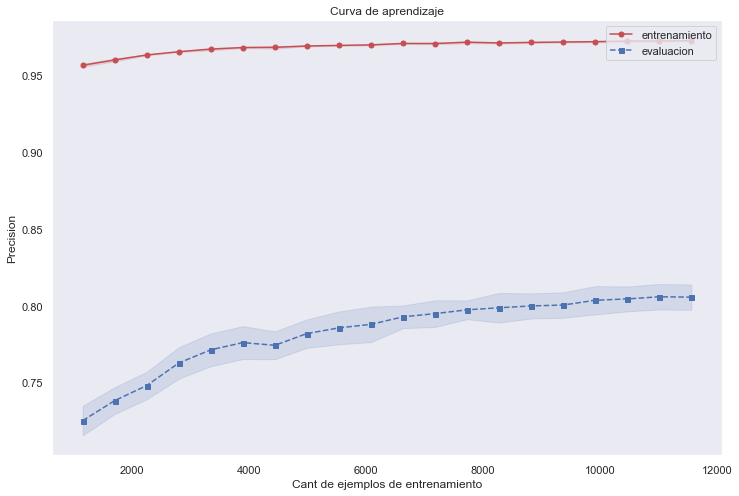

In [84]:
# graficando las curvas
plt.figure(figsize=(12,8))

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje')
plt.legend(loc='upper right')
plt.xlabel('Cant de ejemplos de entrenamiento')
plt.ylabel('Precision')
plt.show()

# Conclusiones!!
Finalmente, podemos ver que el mejor escenario es cuando ocupamos Random Forest, tantos por las metricas entregadas, como por el MAPE correspondiente, siendo este muy bajo, el cual fue nuestro criterio para discriminar entre todas las alternativas. Por otra parte, al ser tan pocos atributos asociados a hartos ejemplos, dedudimos que realizar un ajuste a la dimensionalidad no es muy necesario, puesto que la alta varinza seguira permaneciendo en los atributos mas probables.
Finalmente, a modo de aprendizaje, podemos decir que un buen analisis de los datos nos proporciona un buen criterio para poder procesarlos en un modelo y que es lo relevante, de modo de poder entregar un resultado mas fidedigno.